In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import collections
import seaborn as sns
%matplotlib inline

In [2]:
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv("movies.csv")
tags = pd.read_csv('tags.csv')
scores = pd.read_csv('genome-scores.csv')
links = pd.read_csv('links.csv')
genome_tags = pd.read_csv('genome-tags.csv')

In [3]:
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819


In [4]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [5]:
ratings_df['gave_rating_year'] = ratings_df['timestamp'].dt.year
ratings_df['gave_rating_month'] = ratings_df['timestamp'].dt.month_name().str[:3]

ratings_df.drop('timestamp', axis=1, inplace=True)

In [6]:
ratings_df.head(3)

,userId,movieId,rating,gave_rating_year,gave_rating_month
0,1,2,3.5,2005,Apr
1,1,29,3.5,2005,Apr
2,1,32,3.5,2005,Apr


In [7]:
movies_df = pd.read_csv("movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies_df['title'] = movies_df['title'].astype('str')
title_corpus = ' '.join(movies_df['title'])

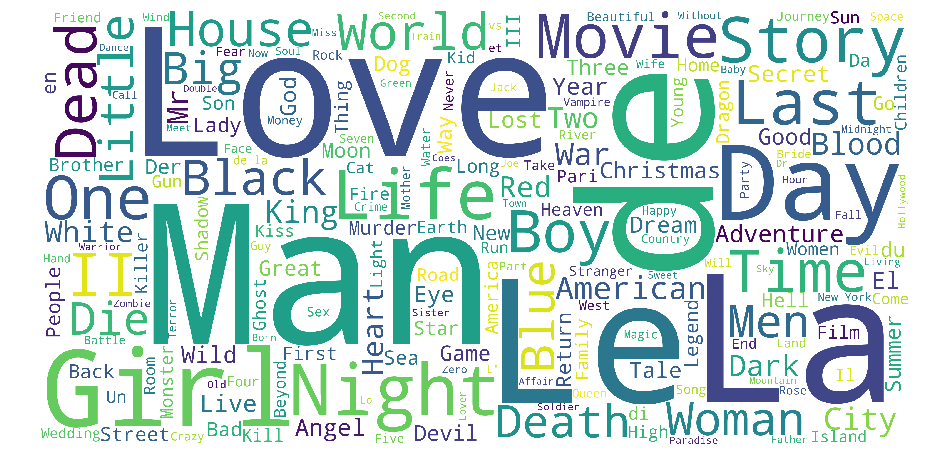

In [9]:
from wordcloud import WordCloud, STOPWORDS
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [10]:
movies_df['genres'] = movies_df['genres'].astype('str')
title_corpus = ' '.join(movies_df['genres'])

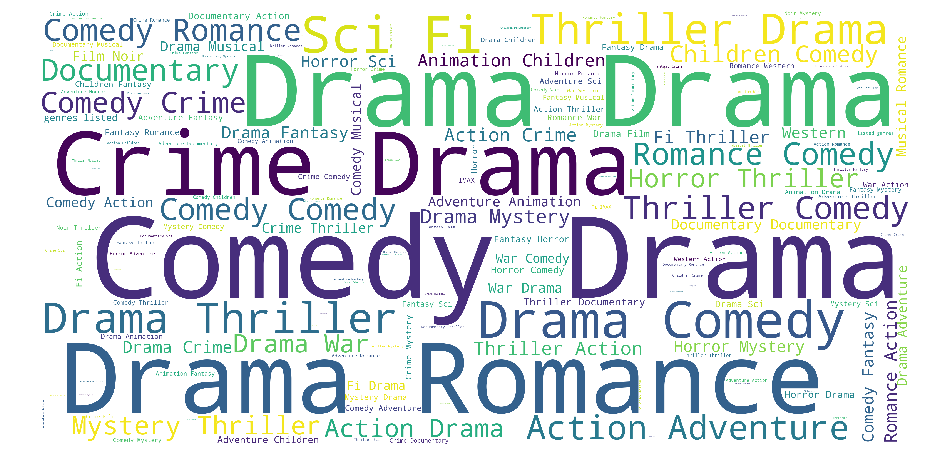

In [11]:
from wordcloud import WordCloud, STOPWORDS
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [12]:
movies_df  = movies_df.iloc[:10000,:]

# Machine Learning model (TF-IDF vectorizer + Cosine Similarity)

TF-IDF


In [13]:
genres_str = movies_df['genres'].str.split('|').astype(str)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0)

tfidf_matrix = tfidf.fit_transform(genres_str)

tfidf_matrix.shape  


(10000, 165)

# Cosine - Similarity

In [15]:
# Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.31566917, 0.05942385, 0.05198214],
       [0.31566917, 1.        , 0.        , 0.        ],
       [0.05942385, 0.        , 1.        , 0.35687666],
       [0.05198214, 0.        , 0.35687666, 1.        ]])

In [16]:
indices = pd.Series(movies_df.index, index=movies_df['title'])


def genre_recommendations(title, similarity=False):
    
    if similarity == False:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11] 
    
        movie_indices = [i[0] for i in sim_scores]
    
        return pd.DataFrame({'Movie': movies_df['title'].iloc[movie_indices].values})
    
    
    elif similarity == True:
        
        idx = indices[title]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]
        
        movie_indices = [i[0] for i in sim_scores]
        similarity_ = [i[1] for i in sim_scores]
        
        return pd.DataFrame({'Movie': movies_df['title'].iloc[movie_indices].values,
                             'Similarity': similarity_})

In [17]:

genre_recommendations('Toy Story (1995)', similarity=True)

,Movie,Similarity
0,Antz (1998),1.000000
1,Toy Story 2 (1999),1.000000
2,"Adventures of Rocky and Bullwinkle, The (2000)",1.000000
3,"Emperor's New Groove, The (2000)",1.000000
4,"Monsters, Inc. (2001)",1.000000
5,"Twelve Tasks of Asterix, The (Les douze travau...",0.930851
6,Shrek (2001),0.893776
7,"American Tail, An (1986)",0.870213
8,"Bug's Life, A (1998)",0.870213
9,Jimmy Neutron: Boy Genius (2001),0.870213
